In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn 


E:\Anaconda\envs\tf\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [17]:
df=pd.read_excel('Train.xlsx')

E:\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  """Entry point for launching an IPython kernel.


In [18]:
df

,Date,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,(Inverters)
0,2016-02-01,0.10,9.45,3.11,0.32,79.46,4.70,29.23,30.02,20256,NaN
1,2016-02-02,0.80,3.94,6.99,6.22,93.60,13.29,28.91,29.70,1761,NaN
2,2016-02-03,0.87,8.70,1.62,0.02,85.00,16.73,29.03,29.82,2775,NaN
3,2016-02-04,0.37,10.00,-2.47,-5.89,74.52,9.46,29.46,30.26,28695,NaN
4,2016-02-05,0.52,9.21,-2.00,-4.15,82.03,5.92,29.55,30.35,9517,NaN
...,...,...,...,...,...,...,...,...,...,...,...
632,2017-10-25,0.23,10.00,5.87,2.89,82.33,5.56,29.04,29.83,13737,NaN
633,2017-10-26,0.01,10.00,10.59,5.32,72.74,9.61,28.97,29.76,27465,NaN
634,2017-10-27,0.89,10.00,5.79,0.04,67.37,13.62,29.08,29.87,15797,NaN
635,2017-10-28,0.99,9.67,3.43,-0.11,77.87,9.67,29.15,29.94,6400,NaN


In [21]:
se=df.reset_index()['Solar energy']

In [22]:
se

0      20256
1       1761
2       2775
3      28695
4       9517
       ...  
632    13737
633    27465
634    15797
635     6400
636     8537
Name: Solar energy, Length: 637, dtype: int64

In [23]:
se.value_counts()

24367    2
28642    2
33236    2
37546    1
27296    1
        ..
32084    1
21845    1
30038    1
36183    1
15359    1
Name: Solar energy, Length: 634, dtype: int64

In [24]:
plt.plot(se)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [26]:
se=scaler.fit_transform(np.array(se).reshape(-1,1))

In [27]:
se

array([[0.49605446],
       [0.02977436],
       [0.05533846],
       [0.70881129],
       [0.22531199],
       [0.66539771],
       [0.54922476],
       [0.1113072 ],
       [0.15280474],
       [0.50871045],
       [0.76465398],
       [0.18971385],
       [0.75073743],
       [0.13195512],
       [0.17622589],
       [0.66852389],
       [0.1762511 ],
       [0.46804488],
       [0.50117232],
       [0.75129207],
       [0.6703643 ],
       [0.65740577],
       [0.64232951],
       [0.0223875 ],
       [0.3542922 ],
       [0.41053826],
       [0.80650447],
       [0.6380184 ],
       [0.78880625],
       [0.08738182],
       [0.76548594],
       [0.05889323],
       [0.74854406],
       [0.2289676 ],
       [0.70697088],
       [0.20231943],
       [0.5701248 ],
       [0.17599899],
       [0.13775369],
       [0.64558175],
       [0.19599143],
       [0.15918316],
       [0.16866255],
       [0.73503088],
       [0.8232951 ],
       [0.79286525],
       [0.64288415],
       [0.326

In [28]:
se.shape

(637, 1)

In [29]:
trs=int(len(se)*0.75)
ts=len(se)-trs

In [30]:
trs,ts

(477, 160)

In [38]:
train=se[0:trs]
test=se[trs:]

In [39]:
train.shape

(477, 1)

In [40]:
test.shape

(160, 1)

In [43]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [44]:
X_train,Y_train=create_dataset(train,9)

In [46]:
X_train[0]

array([0.49605446, 0.02977436, 0.05533846, 0.70881129, 0.22531199,
       0.66539771, 0.54922476, 0.1113072 , 0.15280474])

In [47]:
Y_train[0]

0.5087104500189084

In [48]:
X_test,Y_test=create_dataset(test,9)

In [49]:
X_test.shape

(150, 9)

In [50]:
X_train.shape

(467, 9)

In [51]:
Y_test.shape

(150,)

In [53]:
Y_train.shape

(467,)

# Adding extra column which is required for LSTM

In [54]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [56]:
X_train.shape

(467, 9, 1)

In [57]:
X_test.shape

(150, 9, 1)

# Model Definition

In [62]:
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [64]:

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(9,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 9, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 9, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [66]:

model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=32,verbose=1)

Train on 467 samples, validate on 150 samples
Epoch 1/100
467/467 [==============================] - 7s 16ms/sample - loss: 0.1727 - val_loss: 0.0735
Epoch 2/100
467/467 [==============================] - 0s 365us/sample - loss: 0.0688 - val_loss: 0.0594
Epoch 3/100
467/467 [==============================] - 0s 347us/sample - loss: 0.0637 - val_loss: 0.0535
Epoch 4/100
467/467 [==============================] - 0s 335us/sample - loss: 0.0633 - val_loss: 0.0516
Epoch 5/100
467/467 [==============================] - 0s 375us/sample - loss: 0.0629 - val_loss: 0.0520
Epoch 6/100
467/467 [==============================] - 0s 298us/sample - loss: 0.0620 - val_loss: 0.0514
Epoch 7/100
467/467 [==============================] - 0s 310us/sample - loss: 0.0625 - val_loss: 0.0514
Epoch 8/100
467/467 [==============================] - 0s 315us/sample - loss: 0.0635 - val_loss: 0.0516
Epoch 9/100
467/467 [==============================] - 0s 343us/sample - loss: 0.0628 - val_loss: 0.0532
Epoch 10/1

In [67]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [68]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [70]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

22070.673432192365

In [72]:
math.sqrt(mean_squared_error(Y_test,test_predict))

24407.146808865935

In [84]:
inp=test[-9:].reshape(1,-1)

In [85]:
inp

array([[0.35330896, 0.11758477, 0.06580108, 0.12219841, 0.33170301,
        0.67780159, 0.38363797, 0.14672885, 0.20060507]])

In [86]:
inp.shape

(1, 9)

In [87]:
inp[0]

array([0.35330896, 0.11758477, 0.06580108, 0.12219841, 0.33170301,
       0.67780159, 0.38363797, 0.14672885, 0.20060507])

In [88]:
temp=list(inp)
temp

[array([0.35330896, 0.11758477, 0.06580108, 0.12219841, 0.33170301,
        0.67780159, 0.38363797, 0.14672885, 0.20060507])]

In [89]:
temp=temp[0].tolist()

In [90]:
temp

[0.3533089625614521,
 0.1175847724694315,
 0.06580108407916299,
 0.1221984116979705,
 0.33170301273162733,
 0.6778015883020295,
 0.38363796798184796,
 0.14672885415353587,
 0.2006050674398084]

In [95]:
t=np.array(temp)

In [97]:
t.shape

(9,)

In [99]:
t=t.reshape(-1,9)

In [100]:
t.shape

(1, 9)

In [103]:
t=t.reshape(1,9,1)

In [104]:
t.shape

(1, 9, 1)

In [113]:
pr=model.predict(t,verbose=0)

In [116]:
pr[0][0]

0.31591207

In [121]:
temp=temp[0:9]

In [122]:
temp.append(pr[0][0])

In [123]:
temp

[0.3533089625614521,
 0.1175847724694315,
 0.06580108407916299,
 0.1221984116979705,
 0.33170301273162733,
 0.6778015883020295,
 0.38363796798184796,
 0.14672885415353587,
 0.2006050674398084,
 0.31591207]

In [127]:
n=np.array(temp)

In [131]:
n=n.reshape(-1,1)

In [132]:
n.shape

(10, 1)

In [133]:
p=scaler.inverse_transform(n)

In [134]:
p

array([[14594.        ],
       [ 5244.        ],
       [ 3190.        ],
       [ 5427.        ],
       [13737.        ],
       [27465.        ],
       [15797.        ],
       [ 6400.        ],
       [ 8537.        ],
       [13110.65217286]])

In [144]:
day_new=np.arange(1,9)
day_pred=np.arange(9,10)

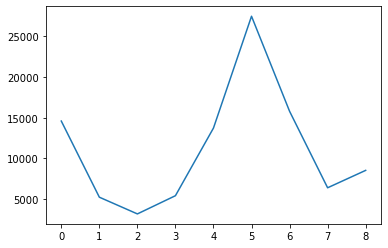

In [149]:
plt.plot(p[0:9])
plt.plot(p[9])

array([[14594.],
       [ 5244.],
       [ 3190.],
       [ 5427.],
       [13737.],
       [27465.],
       [15797.],
       [ 6400.],
       [ 8537.]])